In [1]:
# Seaborn visualization library
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame

#### Specify file path

In [2]:
plot_file_path="../plotImages/"

plot_data_path="../plotData/"

#### Specify Plot ID

In [3]:
plotID = '1'

In [4]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Air Parameters

data_plot1_met = read_excel('../PlotData/Plot'+plotID+'_GasFlux_MetData_AirParams.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [5]:
data_plot1_met['Flux'].max()

2055.632

In [6]:
data_plot1_met[data_plot1_met['Flux'] == 2055.632]

,TIMESTAMP_1_rounded,Flux,ghg,flux_unit,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,Pa_1_1_1,P_1_1_1
122,2019-04-26 17:00:00,2055.632,CO2_dry,mg,3.059289,0.026121,11.31,75.815,99.5,0.0


In [7]:

data_plot1_met[data_plot1_met['TIMESTAMP_1_rounded'].dt.date == '2019-06-29']

,TIMESTAMP_1_rounded,Flux,ghg,flux_unit,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,Pa_1_1_1,P_1_1_1


In [8]:
data_plot1_test = read_excel('../PlotData/plotData_1.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [9]:
data_plot1_test['flux'].max()

5148.4019

In [10]:
data_plot1_test[data_plot1_test['flux'] == 5148.4019]

,QC,Plot_ID,DailyRep,treatment,Date,pv,ghg,unit,flux,r2,nrmse,podpu,epoch_time,DateTime
571,0,1,1,F0,2019-06-29,***,CH4_dry,mug,5148.4019,0.4055,0.1922,0.4275,1561783710,2019-06-29 04:46:00


In [11]:
data_plot1_met[data_plot1_met['Flux'] == 2055.632]

,TIMESTAMP_1_rounded,Flux,ghg,flux_unit,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,Pa_1_1_1,P_1_1_1
122,2019-04-26 17:00:00,2055.632,CO2_dry,mg,3.059289,0.026121,11.31,75.815,99.5,0.0


print('G_1_1_1= '+str(data_plot1_met['G_1_1_1'].max()),
      'G_2_1_1= '+str(data_plot1_met['G_2_1_1'].max()), 
      'Ta_1_1_1= '+str(data_plot1_met['Ta_1_1_1'].max()), 
      'RH_1_1_1= '+str(data_plot1_met['RH_1_1_1'].max()), 
      'Pa_1_1_1= '+str(data_plot1_met['Pa_1_1_1'].max()), 
      'P_1_1_1= '+str(data_plot1_met['P_1_1_1'].max())
     
     )


##### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - AIR PARAMETERS 
(Soil heat flux, Air temperature, Humidity, Atmospheric Pressure, Precipitation)

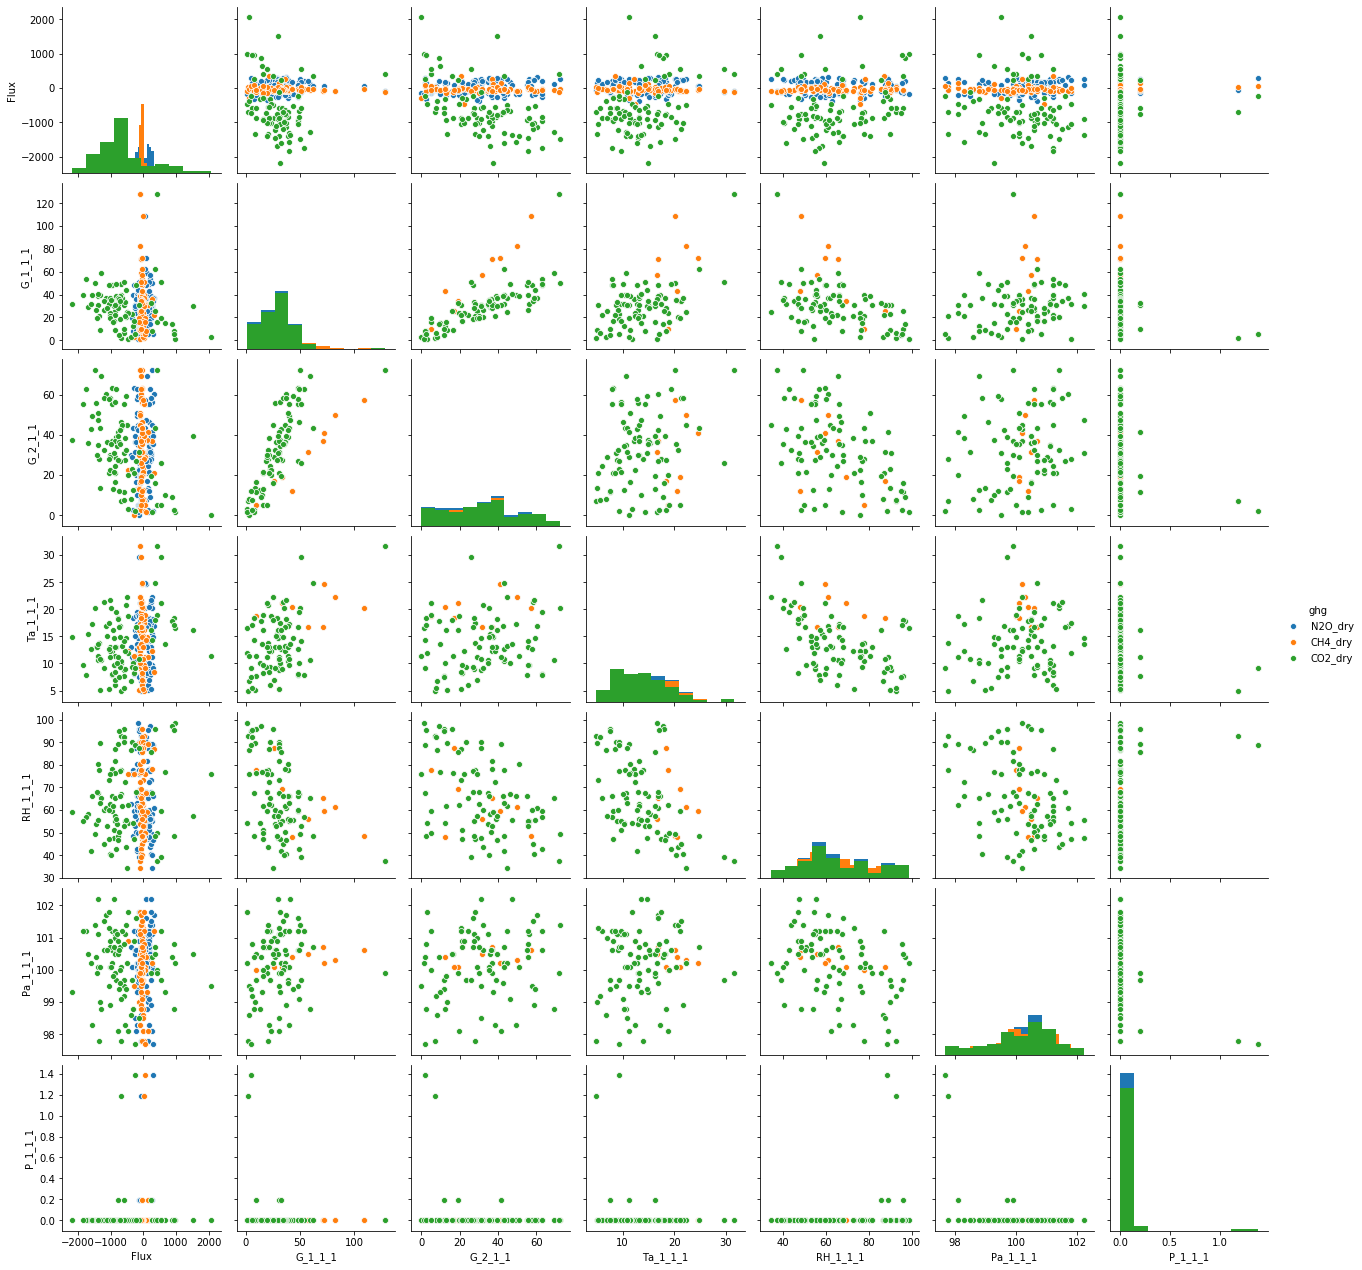

In [12]:
#make pairplots - Air parameters

#NOTE: if you don't specify the diag_kind argument when putting a hue parameter in the pairplot, it will try to draw a kde and create an error.
sns.pairplot(data_plot1_met, vars = ["Flux", "G_1_1_1", "G_2_1_1", "Ta_1_1_1", "RH_1_1_1", "Pa_1_1_1", "P_1_1_1"], hue='ghg', diag_kind='hist')

In [ ]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(data_plot1_met, vars = ["Flux", "G_1_1_1", "G_2_1_1", "Ta_1_1_1", "RH_1_1_1", "Pa_1_1_1", "P_1_1_1"], hue='ghg', diag_kind ='hist', plot_kws = {'alpha': 0.8, 's': 100, 'edgecolor': 'g'}, height = 8)

In [ ]:
print('seaborn: {}'.format(sns.__version__))
sns.distributions._has_statsmodels =  False    #https://github.com/mwaskom/seaborn/issues/1990

#### Error when using hue on pairplot for Seaborn version 0.10.0
This works for Seaborn version 0.9.0
The problem is linked with statsmodel - seaborn fails to capture all runtime errors linked with statsmodel in this new version
https://github.com/mwaskom/seaborn/issues/1990
    


In [ ]:
pp = sns.pairplot(data=data_plot1_met, 
                  vars = ["Flux", "G_1_1_1", "G_2_1_1", "Ta_1_1_1", "RH_1_1_1", "Pa_1_1_1", "P_1_1_1"],
                  hue = "ghg",
                  #plot_kws=dict(edgecolor="black", linewidth=0.5),
                  #height=8, aspect=1
                  palette={"N2O_dry": "#45DF7E", "CH4_dry": "#4776F6", "CO2_dry": "#F67647"},
                  #diag_kind='auto'
                 )

fig = pp.fig
#fig.set_figheight(20)
#fig.set_figwidth(25)
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Correlation between Plot 1 gas flux and Met Data [Air Parameters]', fontsize=22)

fig.text(0.83, 0.98,' G_1_1_1 = Soil heat flux \n \
G_2_1_1 = Soil heat flux \n \
Ta_1_1_1 = Air temperature \n \
RH_1_1_1 = Humidity \n \
Pa_1_1_1 = Atmospheric Pressure \n \
P_1_1_1 = Precipitation', fontsize=16, color='darkblue'
)  

plt.show()

Note on the above pairplot:
a) Maximum values for the air parameters for Plot 1 are as follows:
G_1_1_1= 128.36065, G_2_1_1= 72.313975, Ta_1_1_1= 31.63, RH_1_1_1= 98.65, Pa_1_1_1= 102.2, P_1_1_1= 1.386

b) Although Plot1 noted a value of >5000 for CH4_dry occurring on 2019-06-29 04:46:00, once we combine the met data together with Plot1 gasflux data, the highest flux value recorded for Plot1 is around 2000 (occurring on 2019-04-26). This is because there is no recording for met data at the time of the highest recording of flux data (5000) for Plot1.
Only those date/times have plotted that match in both the Plot1 data and the met data

c) There seems to be a positive correlation between (G_1_1_1 and G_2_1_1) and (G_1_1_1 and Ta_1_1_1)

d) There seems to be a negative correlation between (G_1_1_1 and RH_1_1_1) and (G_2_1_1 and RH_1_1_1)

e) The correlation between the flux and these air parameters seems neutral

##### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - RADIATION PARAMETERS 
(Photosynthetic photon flux density
Shortwave incoming radiation
Shortwave outgoing radiation
Longwave incoming radiation
Longwave outgoing radiation
Net radiation)

In [ ]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Radiation Parameters

data_plot1_metR = read_excel('../PlotData/Plot'+plotID+'_GasFlux_MetData_Radiation.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [ ]:
data_plot1_metR

In [ ]:
sns.set(font_scale = 1.5)
pp = sns.pairplot(data=data_plot1_metR, 
                  vars = ["Flux", "PPFD_1_1_1", "SWin_1_1_1", "SWout_1_1_1", "LWin_1_1_1", "LWout_1_1_1", "Rnet_1_1_1"],
                  hue = "ghg",
                  #plot_kws=dict(edgecolor="black", linewidth=0.5),
                  #height=12, aspect=2,
                  palette={"N2O_dry": "#45DF7E", "CH4_dry": "#4776F6", "CO2_dry": "#F67647"}
                  #diag_kind='auto'
                 )

fig = pp.fig
#fig.set_figheight(20)
#fig.set_figwidth(25)
fig.subplots_adjust(top=0.93, wspace=0.3) #0.6
fig.suptitle('Correlation between Plot 1 gas flux and Met Data (Radiation) ', fontsize=22)

fig.text(0.73, 0.98,' PPFD_1_1_1 = Photosynthetic photon flux density \n \
SWin_1_1_1 = Shortwave incoming radiation \n \
SWout_1_1_1 = Shortwave outgoing radiation \n \
LWin_1_1_1 = Longwave incoming radiation \n \
LWout_1_1_1 = Longwave outgoing radiation \n \
Rnet_1_1_1 = Net radiation', fontsize=16, color='darkblue'
)        
#plt.figure(figsize=(12, 6), dpi=70)
plt.show()

##### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - SOIL PARAMETERS (STP)
(Soil temperature @ 2cm
Soil temperature @ 5cm
Soil temperature @ 10cm
Soil temperature @ 20cm
Soil temperature @ 50cm)

In [ ]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Soil Parameters (STP)

data_plot1_metSTP = read_excel('../PlotData/Plot'+plotID+'_GasFlux_MetData_SoilParams_STP_Filtered.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [ ]:
data_plot1_metSTP

In [ ]:
sns.set(font_scale = 1.5)
pp = sns.pairplot(data=data_plot1_metSTP, 
                  vars = ["Flux", "STP_TSoil_2_1_1_1", "STP_TSoil5_1_1_1", "STP_TSoil10_1_1_1", "STP_TSoil20_1_1_1", "STP_TSoil50_1_1_1"],
                  hue = "ghg",
                  #plot_kws=dict(edgecolor="black", linewidth=0.5),
                  #height=12, aspect=2,
                  palette={"N2O_dry": "#45DF7E", "CH4_dry": "#4776F6", "CO2_dry": "#F67647"}
                  #diag_kind='auto'
                 )

fig = pp.fig
#fig.set_figheight(20)
#fig.set_figwidth(25)
fig.subplots_adjust(top=0.93, wspace=0.3) #0.6
fig.suptitle('Correlation between Plot 1 gas flux and Met Data (Soil Parameters [STP]) ', fontsize=22)

fig.text(0.73, 1.0, ' STP_TSoil_2_1_1_1 = Soil temperature @ 2cm \n \
STP_TSoil5_1_1_1 = Soil temperature @ 5cm \n \
STP_TSoil10_1_1_1 = Soil temperature @ 10cm \n \
STP_TSoil20_1_1_1 = Soil temperature @ 20cm \n \
STP_TSoil50_1_1_1 = Soil temperature @ 50cm', \
fontsize=16, color='darkblue'
)
        
#plt.figure(figsize=(12, 6), dpi=70)
plt.show()

##### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - SOIL PARAMETERS (TDT)
(Soil temperature @ 5cm, Soil temperature @ 10cm, Soil temperature @ 15cm, Soil temperature @ 25cm)

In [ ]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Soil Parameters (TDT)

data_plot1_metTDT = read_excel('../PlotData/Plot'+plotID+'_GasFlux_MetData_SoilParams_TDT_Filtered.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [ ]:
data_plot1_metTDT

In [ ]:
sns.set(font_scale = 1.5)
pp = sns.pairplot(data=data_plot1_metTDT, 
                  vars = ["Flux", "TDT1_Ts_1_1_1", "TDT2_Ts_1_1_1", "TDT3_Ts_1_1_1", "TDT4_Ts_1_1_1"],
                  hue = "ghg",
                  #plot_kws=dict(edgecolor="black", linewidth=0.5),
                  #height=12, aspect=2,
                  palette={"N2O_dry": "#45DF7E", "CH4_dry": "#4776F6", "CO2_dry": "#F67647"}
                  #diag_kind='auto'
                 )

fig = pp.fig
#fig.set_figheight(20)
#fig.set_figwidth(25)
fig.subplots_adjust(top=0.93, wspace=0.3) #0.6
fig.suptitle('Correlation between Plot 1 gas flux and Met Data (Soil Parameters [STP]) ', fontsize=22)

fig.text(0.73, 1.0, ' TDT1_Ts_1_1_1 = Soil temperature @ 5cm \n \
TDT2_Ts_1_1_1 = Soil temperature @ 10cm \n \
TDT3_Ts_1_1_1 = Soil temperature @ 15cm \n \
TDT4_Ts_1_1_1 = Soil temperature @ 25cm', \
fontsize=16, color='darkblue'
)
   
#plt.figure(figsize=(12, 6), dpi=70)
plt.show()

##### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - SOIL PARAMETERS (VWC)
(Soil temperature @ 5cm, Soil temperature @ 10cm, Soil temperature @ 15cm, Soil temperature @ 25cm)

In [ ]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Soil Parameters (TDT)

data_plot1_metVWC = read_excel('../PlotData/Plot'+plotID+'_GasFlux_MetData_SoilParams_VWC_Filtered.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]    

In [ ]:
data_plot1_metVWC

In [ ]:
sns.set(font_scale = 1.5)
pp = sns.pairplot(data=data_plot1_metVWC, 
                  vars = ["Flux", "VWC_1_1_1", "VWC_2_1_1", "VWC_3_1_1", "VWC_4_1_1"],
                  hue = "ghg",
                  #plot_kws=dict(edgecolor="black", linewidth=0.5),
                  #height=12, aspect=2,
                  palette={"N2O_dry": "#45DF7E", "CH4_dry": "#4776F6", "CO2_dry": "#F67647"}
                  #diag_kind='auto'
                 )

fig = pp.fig
#fig.set_figheight(20)
#fig.set_figwidth(25)
fig.subplots_adjust(top=0.93, wspace=0.3) #0.6
fig.suptitle('Correlation between Plot '+plotID+' gas flux and Met Data (Volumetric Water Content [VWC]) ', fontsize=22)

fig.text(0.73, 1.0, ' VWC_1_1_1 = Volumetric water capacity @ 5cm \n \
VWC_2_1_1 = Volumetric water capacity @ 10cm \n \
VWC_3_1_1 = Volumetric water capacity @ 15cm \n \
VWC_4_1_1 = Volumetric water capacity @ 25cm', \
fontsize=16, color='darkblue'
)
       
#plt.figure(figsize=(12, 6), dpi=70)
plt.show()